# Linear Regression Model

## On Pune_House_data

### 1.1 Import libraries

In [1]:
import numpy as np
import pandas as pd

#for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#avoid warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Problem Statement

### ***To Predict Price of Houses in Pune location...***

## 2. Data Gathering:-

In [2]:
df = pd.read_csv("Pune_House_Data.csv")
df

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,Pashan
13316,Super built-up Area,Ready To Move,4 BHK,NaN,3600,5.0,NaN,400.00,Paud Road
13317,Built-up Area,Ready To Move,2 BHK,Mahla T,1141,2.0,1.0,60.00,Pirangut
13318,Super built-up Area,18-Jun,4 BHK,SollyCl,4689,4.0,1.0,488.00,Prabhat Road


## 3. Exploratory Data Analysis:-

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### 3.1 area_type

In [4]:
df['area_type']

0        Super built-up  Area
1                  Plot  Area
2              Built-up  Area
3        Super built-up  Area
4        Super built-up  Area
                 ...         
13315          Built-up  Area
13316    Super built-up  Area
13317          Built-up  Area
13318    Super built-up  Area
13319    Super built-up  Area
Name: area_type, Length: 13320, dtype: object

In [5]:
df['area_type'].isna().sum()

0

In [6]:
df['area_type'].value_counts().to_dict() #One Hot Encoding

{'Super built-up  Area': 8790,
 'Built-up  Area': 2418,
 'Plot  Area': 2025,
 'Carpet  Area': 87}

In [7]:
df = pd.get_dummies(df,columns=["area_type"])

In [8]:
df.head().T

,0,1,2,3,4
availability,19-Dec,Ready To Move,Ready To Move,Ready To Move,Ready To Move
size,2 BHK,4 Bedroom,3 BHK,3 BHK,2 BHK
society,Coomee,Theanmp,NaN,Soiewre,NaN
total_sqft,1056,2600,1440,1521,1200
bath,2.0,5.0,2.0,3.0,2.0
balcony,1.0,3.0,3.0,1.0,1.0
price,39.07,120.0,62.0,95.0,51.0
site_location,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road
area_type_Built-up Area,0,0,1,0,0
area_type_Carpet Area,0,0,0,0,0


### 3.2 availability

In [9]:
df['availability']

0               19-Dec
1        Ready To Move
2        Ready To Move
3        Ready To Move
4        Ready To Move
             ...      
13315    Ready To Move
13316    Ready To Move
13317    Ready To Move
13318           18-Jun
13319    Ready To Move
Name: availability, Length: 13320, dtype: object

In [10]:
df['availability'].isnull().sum()

0

In [11]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [12]:
df['availability'].unique().tolist()

['19-Dec',
 'Ready To Move',
 '18-May',
 '18-Feb',
 '18-Nov',
 '20-Dec',
 '17-Oct',
 '21-Dec',
 '19-Sep',
 '20-Sep',
 '18-Mar',
 '20-Feb',
 '18-Apr',
 '20-Aug',
 '18-Oct',
 '19-Mar',
 '17-Sep',
 '18-Dec',
 '17-Aug',
 '19-Apr',
 '18-Jun',
 '22-Dec',
 '22-Jan',
 '18-Aug',
 '19-Jan',
 '17-Jul',
 '18-Jul',
 '21-Jun',
 '20-May',
 '19-Aug',
 '18-Sep',
 '17-May',
 '17-Jun',
 '21-May',
 '18-Jan',
 '20-Mar',
 '17-Dec',
 '16-Mar',
 '19-Jun',
 '22-Jun',
 '19-Jul',
 '21-Feb',
 'Immediate Possession',
 '19-May',
 '17-Nov',
 '20-Oct',
 '20-Jun',
 '19-Feb',
 '21-Oct',
 '21-Jan',
 '17-Mar',
 '17-Apr',
 '22-May',
 '19-Oct',
 '21-Jul',
 '21-Nov',
 '21-Mar',
 '16-Dec',
 '22-Mar',
 '20-Jan',
 '21-Sep',
 '21-Aug',
 '14-Nov',
 '19-Nov',
 '15-Nov',
 '16-Jul',
 '15-Jun',
 '17-Feb',
 '20-Nov',
 '20-Jul',
 '16-Sep',
 '15-Oct',
 '15-Dec',
 '16-Oct',
 '22-Nov',
 '15-Aug',
 '17-Jan',
 '16-Nov',
 '20-Apr',
 '16-Jan',
 '14-Jul']

In [13]:
lst1 = df['availability'].unique().tolist()

dict1_availability = {i:0 for i in lst1}
dict1_availability

{'19-Dec': 0,
 'Ready To Move': 0,
 '18-May': 0,
 '18-Feb': 0,
 '18-Nov': 0,
 '20-Dec': 0,
 '17-Oct': 0,
 '21-Dec': 0,
 '19-Sep': 0,
 '20-Sep': 0,
 '18-Mar': 0,
 '20-Feb': 0,
 '18-Apr': 0,
 '20-Aug': 0,
 '18-Oct': 0,
 '19-Mar': 0,
 '17-Sep': 0,
 '18-Dec': 0,
 '17-Aug': 0,
 '19-Apr': 0,
 '18-Jun': 0,
 '22-Dec': 0,
 '22-Jan': 0,
 '18-Aug': 0,
 '19-Jan': 0,
 '17-Jul': 0,
 '18-Jul': 0,
 '21-Jun': 0,
 '20-May': 0,
 '19-Aug': 0,
 '18-Sep': 0,
 '17-May': 0,
 '17-Jun': 0,
 '21-May': 0,
 '18-Jan': 0,
 '20-Mar': 0,
 '17-Dec': 0,
 '16-Mar': 0,
 '19-Jun': 0,
 '22-Jun': 0,
 '19-Jul': 0,
 '21-Feb': 0,
 'Immediate Possession': 0,
 '19-May': 0,
 '17-Nov': 0,
 '20-Oct': 0,
 '20-Jun': 0,
 '19-Feb': 0,
 '21-Oct': 0,
 '21-Jan': 0,
 '17-Mar': 0,
 '17-Apr': 0,
 '22-May': 0,
 '19-Oct': 0,
 '21-Jul': 0,
 '21-Nov': 0,
 '21-Mar': 0,
 '16-Dec': 0,
 '22-Mar': 0,
 '20-Jan': 0,
 '21-Sep': 0,
 '21-Aug': 0,
 '14-Nov': 0,
 '19-Nov': 0,
 '15-Nov': 0,
 '16-Jul': 0,
 '15-Jun': 0,
 '17-Feb': 0,
 '20-Nov': 0,
 '20-Jul': 0,

In [14]:
dict1_availability["Ready To Move"] = 1
dict1_availability["Immediate Possession"] = 1
print(dict1_availability)

{'19-Dec': 0, 'Ready To Move': 1, '18-May': 0, '18-Feb': 0, '18-Nov': 0, '20-Dec': 0, '17-Oct': 0, '21-Dec': 0, '19-Sep': 0, '20-Sep': 0, '18-Mar': 0, '20-Feb': 0, '18-Apr': 0, '20-Aug': 0, '18-Oct': 0, '19-Mar': 0, '17-Sep': 0, '18-Dec': 0, '17-Aug': 0, '19-Apr': 0, '18-Jun': 0, '22-Dec': 0, '22-Jan': 0, '18-Aug': 0, '19-Jan': 0, '17-Jul': 0, '18-Jul': 0, '21-Jun': 0, '20-May': 0, '19-Aug': 0, '18-Sep': 0, '17-May': 0, '17-Jun': 0, '21-May': 0, '18-Jan': 0, '20-Mar': 0, '17-Dec': 0, '16-Mar': 0, '19-Jun': 0, '22-Jun': 0, '19-Jul': 0, '21-Feb': 0, 'Immediate Possession': 1, '19-May': 0, '17-Nov': 0, '20-Oct': 0, '20-Jun': 0, '19-Feb': 0, '21-Oct': 0, '21-Jan': 0, '17-Mar': 0, '17-Apr': 0, '22-May': 0, '19-Oct': 0, '21-Jul': 0, '21-Nov': 0, '21-Mar': 0, '16-Dec': 0, '22-Mar': 0, '20-Jan': 0, '21-Sep': 0, '21-Aug': 0, '14-Nov': 0, '19-Nov': 0, '15-Nov': 0, '16-Jul': 0, '15-Jun': 0, '17-Feb': 0, '20-Nov': 0, '20-Jul': 0, '16-Sep': 0, '15-Oct': 0, '15-Dec': 0, '16-Oct': 0, '22-Nov': 0, '15

In [15]:
dict1_availability

{'19-Dec': 0,
 'Ready To Move': 1,
 '18-May': 0,
 '18-Feb': 0,
 '18-Nov': 0,
 '20-Dec': 0,
 '17-Oct': 0,
 '21-Dec': 0,
 '19-Sep': 0,
 '20-Sep': 0,
 '18-Mar': 0,
 '20-Feb': 0,
 '18-Apr': 0,
 '20-Aug': 0,
 '18-Oct': 0,
 '19-Mar': 0,
 '17-Sep': 0,
 '18-Dec': 0,
 '17-Aug': 0,
 '19-Apr': 0,
 '18-Jun': 0,
 '22-Dec': 0,
 '22-Jan': 0,
 '18-Aug': 0,
 '19-Jan': 0,
 '17-Jul': 0,
 '18-Jul': 0,
 '21-Jun': 0,
 '20-May': 0,
 '19-Aug': 0,
 '18-Sep': 0,
 '17-May': 0,
 '17-Jun': 0,
 '21-May': 0,
 '18-Jan': 0,
 '20-Mar': 0,
 '17-Dec': 0,
 '16-Mar': 0,
 '19-Jun': 0,
 '22-Jun': 0,
 '19-Jul': 0,
 '21-Feb': 0,
 'Immediate Possession': 1,
 '19-May': 0,
 '17-Nov': 0,
 '20-Oct': 0,
 '20-Jun': 0,
 '19-Feb': 0,
 '21-Oct': 0,
 '21-Jan': 0,
 '17-Mar': 0,
 '17-Apr': 0,
 '22-May': 0,
 '19-Oct': 0,
 '21-Jul': 0,
 '21-Nov': 0,
 '21-Mar': 0,
 '16-Dec': 0,
 '22-Mar': 0,
 '20-Jan': 0,
 '21-Sep': 0,
 '21-Aug': 0,
 '14-Nov': 0,
 '19-Nov': 0,
 '15-Nov': 0,
 '16-Jul': 0,
 '15-Jun': 0,
 '17-Feb': 0,
 '20-Nov': 0,
 '20-Jul': 0,

In [16]:
df["availability"].replace(dict1_availability, inplace=True)

In [17]:
df["availability"].value_counts()

1    10597
0     2723
Name: availability, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability                    13320 non-null  int64  
 1   size                            13304 non-null  object 
 2   society                         7818 non-null   object 
 3   total_sqft                      13320 non-null  object 
 4   bath                            13247 non-null  float64
 5   balcony                         12711 non-null  float64
 6   price                           13320 non-null  float64
 7   site_location                   13319 non-null  object 
 8   area_type_Built-up  Area        13320 non-null  uint8  
 9   area_type_Carpet  Area          13320 non-null  uint8  
 10  area_type_Plot  Area            13320 non-null  uint8  
 11  area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), int64(1), object(

### 3.3 size

In [19]:
df['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object

In [20]:
df['size'].isna().sum()

16

In [21]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [22]:
df['size'].nunique()

31

In [23]:
df['size'].fillna(df['size'].mode()[0],inplace=True) 
# column has categorical values so missing values replaced by mode and [0] so get 0th index value

In [24]:
df['size'].isna().sum()

0

In [25]:
df['size'].value_counts().to_dict()


{'2 BHK': 5215,
 '3 BHK': 4310,
 '4 Bedroom': 826,
 '4 BHK': 591,
 '3 Bedroom': 547,
 '1 BHK': 538,
 '2 Bedroom': 329,
 '5 Bedroom': 297,
 '6 Bedroom': 191,
 '1 Bedroom': 105,
 '8 Bedroom': 84,
 '7 Bedroom': 83,
 '5 BHK': 59,
 '9 Bedroom': 46,
 '6 BHK': 30,
 '7 BHK': 17,
 '1 RK': 13,
 '10 Bedroom': 12,
 '9 BHK': 8,
 '8 BHK': 5,
 '11 BHK': 2,
 '11 Bedroom': 2,
 '10 BHK': 2,
 '14 BHK': 1,
 '13 BHK': 1,
 '12 Bedroom': 1,
 '27 BHK': 1,
 '43 Bedroom': 1,
 '16 BHK': 1,
 '19 BHK': 1,
 '18 Bedroom': 1}

In [26]:
dict1_size = {'2 BHK': 2,
 '3 BHK': 3,
 '4 Bedroom': 4,
 '4 BHK': 4,
 '3 Bedroom': 3,
 '1 BHK': 1,
 '2 Bedroom': 2,
 '5 Bedroom': 5,
 '6 Bedroom': 6,
 '1 Bedroom': 1,
 '8 Bedroom': 8,
 '7 Bedroom': 7,
 '5 BHK': 5,
 '9 Bedroom': 9,
 '6 BHK': 6,
 '7 BHK': 7,
 '1 RK': 1,
 '10 Bedroom': 10,
 '9 BHK': 9,
 '8 BHK': 8,
 '11 BHK': 11,
 '11 Bedroom': 11,
 '10 BHK': 10,
 '14 BHK': 14,
 '13 BHK': 13,
 '12 Bedroom': 12,
 '27 BHK': 27,
 '43 Bedroom': 43,
 '16 BHK': 16,
 '19 BHK': 19,
 '18 Bedroom': 18}

df["size"].replace(dict1_size, inplace=True)
df["size"]

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13320, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability                    13320 non-null  int64  
 1   size                            13320 non-null  int64  
 2   society                         7818 non-null   object 
 3   total_sqft                      13320 non-null  object 
 4   bath                            13247 non-null  float64
 5   balcony                         12711 non-null  float64
 6   price                           13320 non-null  float64
 7   site_location                   13319 non-null  object 
 8   area_type_Built-up  Area        13320 non-null  uint8  
 9   area_type_Carpet  Area          13320 non-null  uint8  
 10  area_type_Plot  Area            13320 non-null  uint8  
 11  area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), int64(2), object(

### 3.4 society

In [28]:
df["society"]

0        Coomee 
1        Theanmp
2            NaN
3        Soiewre
4            NaN
          ...   
13315    ArsiaEx
13316        NaN
13317    Mahla T
13318    SollyCl
13319        NaN
Name: society, Length: 13320, dtype: object

In [29]:
df["society"].isna().sum()

5502

In [30]:
df["society"].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [31]:
df["society"].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

#### Here so many values are null as well so many unique values in this column and as per concerning the outcome and priority we can drop the column, there is no huge impact on dataset after drop this column

In [32]:
df.drop("society",axis=1,inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability                    13320 non-null  int64  
 1   size                            13320 non-null  int64  
 2   total_sqft                      13320 non-null  object 
 3   bath                            13247 non-null  float64
 4   balcony                         12711 non-null  float64
 5   price                           13320 non-null  float64
 6   site_location                   13319 non-null  object 
 7   area_type_Built-up  Area        13320 non-null  uint8  
 8   area_type_Carpet  Area          13320 non-null  uint8  
 9   area_type_Plot  Area            13320 non-null  uint8  
 10  area_type_Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), int64(2), object(2), uint8(4)
memory usage: 780.6+ KB


### 3.5 total_sqft

In [34]:
df["total_sqft"].info() #datatype is str/object

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: total_sqft
Non-Null Count  Dtype 
--------------  ----- 
13320 non-null  object
dtypes: object(1)
memory usage: 104.2+ KB


In [35]:
df["total_sqft"].isna().sum()

0

In [36]:
df["total_sqft"].value_counts()

1200    843
1100    221
1500    205
2400    196
600     180
       ... 
3580      1
2461      1
1437      1
2155      1
4689      1
Name: total_sqft, Length: 2117, dtype: int64

In [37]:
df["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
#beacuse of values in range so we can use exception handling method

def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

# Displaying all the rows that are not integers
df[~df['total_sqft'].apply(isFloat)]

,availability,size,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
30,0,4,2100 - 2850,4.0,0.0,186.000,Gultekdi,0,0,0,1
56,0,4,3010 - 3410,NaN,NaN,192.000,Model colony,1,0,0,0
81,0,4,2957 - 3450,NaN,NaN,224.500,Shukrawar Peth,1,0,0,0
122,0,4,3067 - 8156,4.0,0.0,477.000,Ganeshkhind,0,0,0,1
137,0,2,1042 - 1105,2.0,0.0,54.005,Khadaki,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
12990,0,3,1804 - 2273,3.0,0.0,122.000,Gokhale Nagar,0,0,0,1
13059,1,2,1200 - 1470,2.0,0.0,72.760,Anandnagar,0,0,0,1
13240,1,1,1020 - 1130,NaN,NaN,52.570,Vadgaon Budruk,0,0,0,1
13265,0,2,1133 - 1384,2.0,0.0,59.135,Dapodi,0,0,0,1


In [39]:
# Converting the range values to integer values and removing other types of error
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)
df = df.drop('total_sqft', axis='columns')
df


,availability,size,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,new_total_sqft
0,0,2,2.0,1.0,39.07,Alandi Road,0,0,0,1,1056.0
1,1,4,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0,2600.0
2,1,3,2.0,3.0,62.00,Anandnagar,1,0,0,0,1440.0
3,1,3,3.0,1.0,95.00,Aundh,0,0,0,1,1521.0
4,1,2,2.0,1.0,51.00,Aundh Road,0,0,0,1,1200.0
...,...,...,...,...,...,...,...,...,...,...,...
13315,1,5,4.0,0.0,231.00,Pashan,1,0,0,0,3453.0
13316,1,4,5.0,NaN,400.00,Paud Road,0,0,0,1,3600.0
13317,1,2,2.0,1.0,60.00,Pirangut,1,0,0,0,1141.0
13318,0,4,4.0,1.0,488.00,Prabhat Road,0,0,0,1,4689.0


In [40]:
df['new_total_sqft'].fillna(df['new_total_sqft'].median(),inplace=True)

In [41]:
df['new_total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: new_total_sqft, Length: 13320, dtype: float64

In [42]:
df['new_total_sqft'].isna().sum()

0

In [43]:
df['new_total_sqft'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 13320 entries, 0 to 13319
Series name: new_total_sqft
Non-Null Count  Dtype  
--------------  -----  
13320 non-null  float64
dtypes: float64(1)
memory usage: 104.2 KB


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability                    13320 non-null  int64  
 1   size                            13320 non-null  int64  
 2   bath                            13247 non-null  float64
 3   balcony                         12711 non-null  float64
 4   price                           13320 non-null  float64
 5   site_location                   13319 non-null  object 
 6   area_type_Built-up  Area        13320 non-null  uint8  
 7   area_type_Carpet  Area          13320 non-null  uint8  
 8   area_type_Plot  Area            13320 non-null  uint8  
 9   area_type_Super built-up  Area  13320 non-null  uint8  
 10  new_total_sqft                  13320 non-null  float64
dtypes: float64(4), int64(2), object(1), uint8(4)
memory usage: 780.6+ KB


### 3.6 bath

In [45]:
df['bath'].isna().sum()

73

In [46]:
df['bath'].fillna(df['bath'].median(),inplace=True) #impute missing values by median

In [47]:
df['bath'].isna().sum()

0

### 3.7 balcony

In [48]:
df['balcony'].isna().sum()

609

In [49]:
df['balcony'].median()

2.0

In [50]:
df['balcony'].mean()

1.5843757375501535

In [51]:
df['balcony'].fillna(df['balcony'].median(),inplace=True)#impute missing values by median

In [52]:
df['balcony'].isna().sum()

0

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   availability                    13320 non-null  int64  
 1   size                            13320 non-null  int64  
 2   bath                            13320 non-null  float64
 3   balcony                         13320 non-null  float64
 4   price                           13320 non-null  float64
 5   site_location                   13319 non-null  object 
 6   area_type_Built-up  Area        13320 non-null  uint8  
 7   area_type_Carpet  Area          13320 non-null  uint8  
 8   area_type_Plot  Area            13320 non-null  uint8  
 9   area_type_Super built-up  Area  13320 non-null  uint8  
 10  new_total_sqft                  13320 non-null  float64
dtypes: float64(4), int64(2), object(1), uint8(4)
memory usage: 780.6+ KB


###  3.8 price

In [54]:
df['price'].isna().sum()

0

### 3.9 site_location

In [55]:
df['site_location'].isna().sum()

1

In [56]:
site_location1 = df['site_location'].unique() # so many categories in this column so we replace dtype object as unit8 by using onehot encoding
site_location1

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar',
       '

In [57]:
#OneHotEncoding
df = pd.get_dummies(df, columns=['site_location'])
df

,availability,size,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,new_total_sqft,...,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada,site_location_other
0,0,2,2.0,1.0,39.07,0,0,0,1,1056.0,...,0,0,0,0,0,0,0,0,0,0
1,1,4,5.0,3.0,120.00,0,0,1,0,2600.0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,2.0,3.0,62.00,1,0,0,0,1440.0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,3.0,1.0,95.00,0,0,0,1,1521.0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,2.0,1.0,51.00,0,0,0,1,1200.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,1,5,4.0,0.0,231.00,1,0,0,0,3453.0,...,0,0,0,0,0,0,0,0,0,0
13316,1,4,5.0,2.0,400.00,0,0,0,1,3600.0,...,0,0,0,0,0,0,0,0,0,0
13317,1,2,2.0,1.0,60.00,1,0,0,0,1141.0,...,0,0,0,0,0,0,0,0,0,0
13318,0,4,4.0,1.0,488.00,0,0,0,1,4689.0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 107 entries, availability to site_location_other
dtypes: float64(4), int64(2), uint8(101)
memory usage: 1.9 MB


## 4. Feature Engineering

<AxesSubplot:>

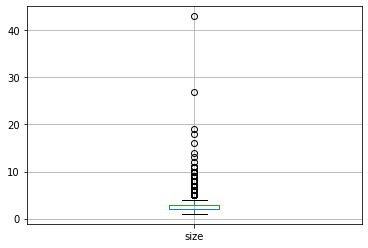

In [59]:
df[['size']].boxplot()

In [60]:
q1=df['size'].quantile(0.25)
q2=df['size'].quantile(0.50)
q3=df['size'].quantile(0.75)

iqr = q3-q1

upper_tail=q3 + (1.5*iqr)
lower_tail=q1 - (1.5*iqr)

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)


q1--> 2.0
q2--> 3.0
q3--> 3.0
upper_tail--> 4.5
lower_tail--> 0.5


In [61]:
size_df = df[['size']].loc[(df['size'] < upper_tail) & (df['size'] > lower_tail)].median()[0]
size_df

3.0

In [62]:
df["size"].loc[(df["size"]>upper_tail)|(df["size"]<lower_tail)] = size_df

<AxesSubplot:>

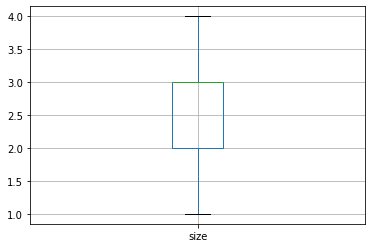

In [63]:
df[['size']].boxplot() #removed outliers by using Imputation Technique

In [64]:
size_df = df[['size']].loc[(df['size']>upper_tail) & (df['size']<lower_tail)].median()

<AxesSubplot:>

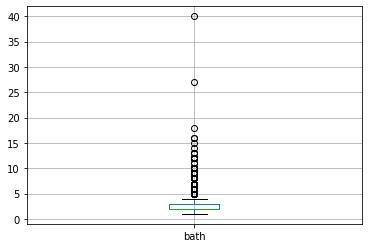

In [65]:
# bath

df[['bath']].boxplot()

In [66]:
q1=df['bath'].quantile(0.25)
q2=df['bath'].quantile(0.50)
q3=df['bath'].quantile(0.75)

iqr = q3-q1

upper_tail=q3 + (1.5*iqr)
lower_tail=q1 - (1.5*iqr)

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

q1--> 2.0
q2--> 2.0
q3--> 3.0
upper_tail--> 4.5
lower_tail--> 0.5


In [67]:
df['bath'].mean()

2.688813813813814

In [68]:
df['bath'].median()

2.0

In [69]:
bath_df=df[['bath']].loc[(df['bath'] < upper_tail) & (df['bath'] > lower_tail)].median()[0]
bath_df

2.0

In [70]:
df.loc[(df['bath'] > upper_tail) | (df['bath'] < lower_tail), 'bath'] = bath_df

<AxesSubplot:>

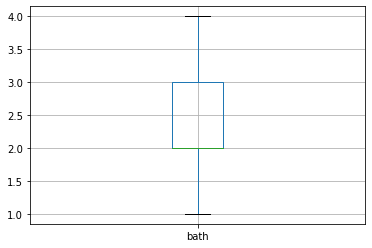

In [71]:
df[['bath']].boxplot()

<AxesSubplot:>

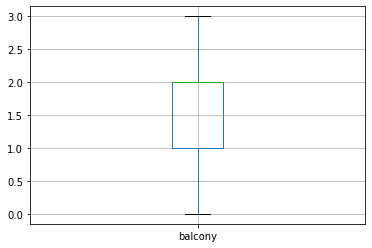

In [72]:
# balcony

df[['balcony']].boxplot()

<AxesSubplot:>

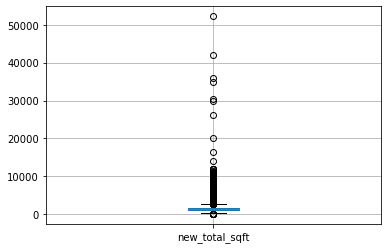

In [73]:
# new_total_sqft


df[['new_total_sqft']].boxplot()

In [74]:
q1=df['new_total_sqft'].quantile(0.25)
q2=df['new_total_sqft'].quantile(0.50)
q3=df['new_total_sqft'].quantile(0.75)

iqr = q3-q1

upper_tail=q3 + (1.5*iqr)
lower_tail=q1 - (1.5*iqr)

print('q1-->',q1)
print('q2-->',q2)
print('q3-->',q3)
print('upper_tail-->',upper_tail)
print('lower_tail-->',lower_tail)

q1--> 1100.0
q2--> 1276.0
q3--> 1678.0
upper_tail--> 2545.0
lower_tail--> 233.0


In [75]:
new_total_df = df[['new_total_sqft']].loc[(df['new_total_sqft'] < upper_tail)&(df['new_total_sqft']> lower_tail)].median()[0]
new_total_df

1240.0

In [76]:
df.loc[(df['new_total_sqft']>upper_tail)|(df['new_total_sqft']<lower_tail)] = new_total_df

<AxesSubplot:>

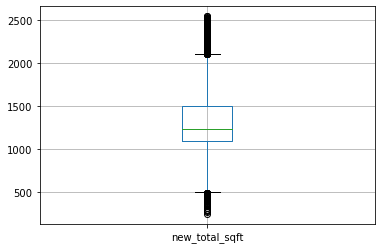

In [77]:
df[['new_total_sqft']].boxplot()

In [78]:
from scipy.stats import zscore
z_score = zscore(df['new_total_sqft'])

<AxesSubplot:xlabel='new_total_sqft'>

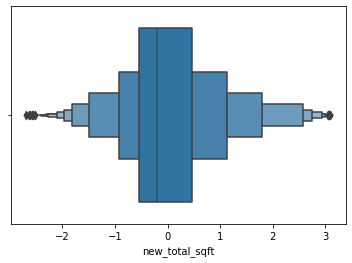

In [79]:
sns.boxenplot(x=z_score)

<AxesSubplot:xlabel='new_total_sqft'>

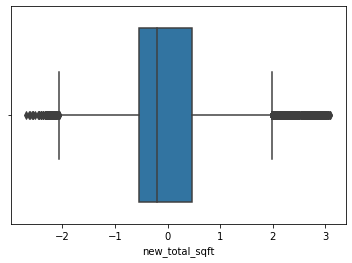

In [80]:
sns.boxplot(x=z_score)

<AxesSubplot:>

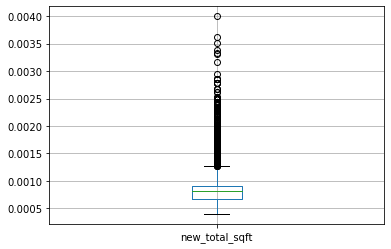

In [81]:
np.reciprocal(df[['new_total_sqft']]).boxplot()

In [82]:
df["new_total_sqft"].loc[(df["new_total_sqft"]>upper_tail)] = upper_tail

<AxesSubplot:>

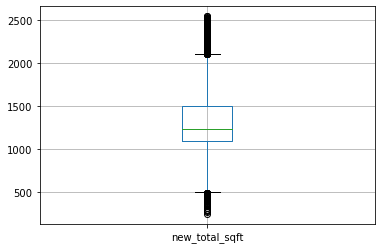

In [83]:
df[['new_total_sqft']].boxplot()

In [84]:
df["new_total_sqft"].loc[(df["new_total_sqft"]>upper_tail)] = lower_tail

<AxesSubplot:>

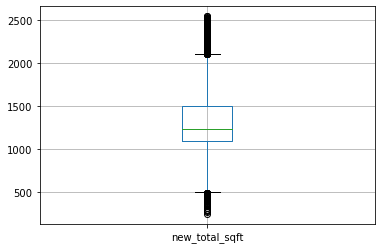

In [85]:
df[['new_total_sqft']].boxplot()

In [86]:
new_total_df=df[['new_total_sqft']].loc[(df['new_total_sqft'] < upper_tail) & 
                                   (df['new_total_sqft'] > lower_tail)].median()[0]


df.loc[(df['new_total_sqft'] > upper_tail) |
                (df['new_total_sqft'] < lower_tail), 'new_total_sqft'] = new_total_df

<AxesSubplot:>

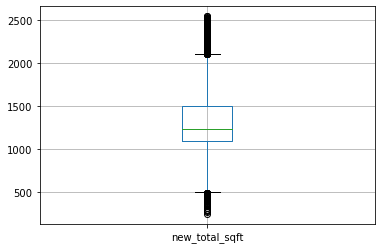

In [87]:
df[['new_total_sqft']].boxplot()

<AxesSubplot:xlabel='new_total_sqft'>

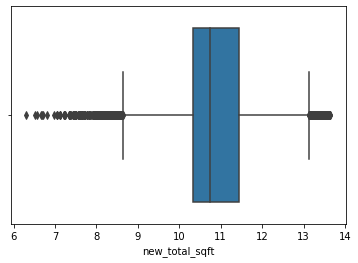

In [88]:
sns.boxplot(x = np.cbrt(df['new_total_sqft']))

<AxesSubplot:xlabel='new_total_sqft'>

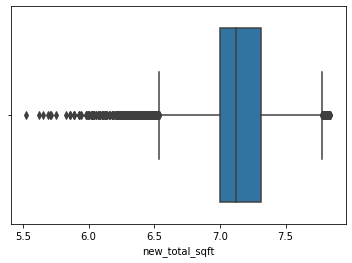

In [89]:
sns.boxplot(x = np.log(df['new_total_sqft']))

<AxesSubplot:>

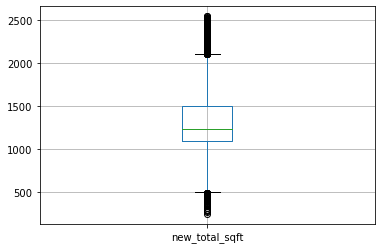

In [90]:
df.loc[(df['new_total_sqft'] > upper_tail) |(df['new_total_sqft'] < lower_tail), 'new_total_sqft'] = lower_tail

df[['new_total_sqft']].boxplot()

<AxesSubplot:>

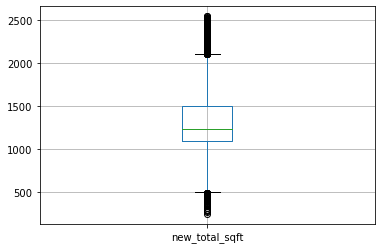

In [91]:
df.loc[(df['new_total_sqft'] > upper_tail) |
                (df['new_total_sqft'] < lower_tail), 'new_total_sqft'] = upper_tail

df[['new_total_sqft']].boxplot()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 107 entries, availability to site_location_other
dtypes: float64(4), int64(2), uint8(101)
memory usage: 1.9 MB


## Checking assumptions of linear model before training model

## Linearity

In [93]:
df.corr()

,availability,size,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,new_total_sqft,...,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada,site_location_other
availability,1.000000,0.999998,0.999998,0.999997,0.978836,0.999983,0.999999,0.999985,0.999972,-0.059237,...,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999998,0.999999
size,0.999998,1.000000,0.999999,0.999997,0.978992,0.999980,0.999997,0.999987,0.999969,-0.058159,...,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999998
bath,0.999998,0.999999,1.000000,0.999997,0.978968,0.999980,0.999997,0.999986,0.999970,-0.058214,...,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999998
balcony,0.999997,0.999997,0.999997,1.000000,0.978868,0.999979,0.999997,0.999982,0.999973,-0.058665,...,0.999996,0.999996,0.999996,0.999996,0.999996,0.999996,0.999997,0.999996,0.999996,0.999998
price,0.978836,0.978992,0.978968,0.978868,1.000000,0.978728,0.978813,0.979219,0.978443,0.056595,...,0.978810,0.978811,0.978810,0.978815,0.978809,0.978810,0.978817,0.978811,0.978811,0.978815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
site_location_Wakadewadi,0.999998,0.999997,0.999997,0.999996,0.978810,0.999981,0.999998,0.999984,0.999972,-0.059303,...,0.999997,0.999998,0.999997,0.999997,0.999997,1.000000,0.999998,0.999997,0.999998,0.999999
site_location_Wanowrie,0.999998,0.999997,0.999997,0.999997,0.978817,0.999981,0.999998,0.999984,0.999972,-0.059236,...,0.999997,0.999998,0.999997,0.999997,0.999997,0.999998,1.000000,0.999997,0.999998,0.999999
site_location_Warje,0.999998,0.999997,0.999997,0.999996,0.978811,0.999981,0.999998,0.999984,0.999972,-0.059272,...,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,0.999997,1.000000,0.999997,0.999999
site_location_Yerawada,0.999998,0.999997,0.999997,0.999996,0.978811,0.999981,0.999998,0.999984,0.999972,-0.059305,...,0.999998,0.999998,0.999997,0.999998,0.999998,0.999998,0.999998,0.999997,1.000000,0.999999


<AxesSubplot:>

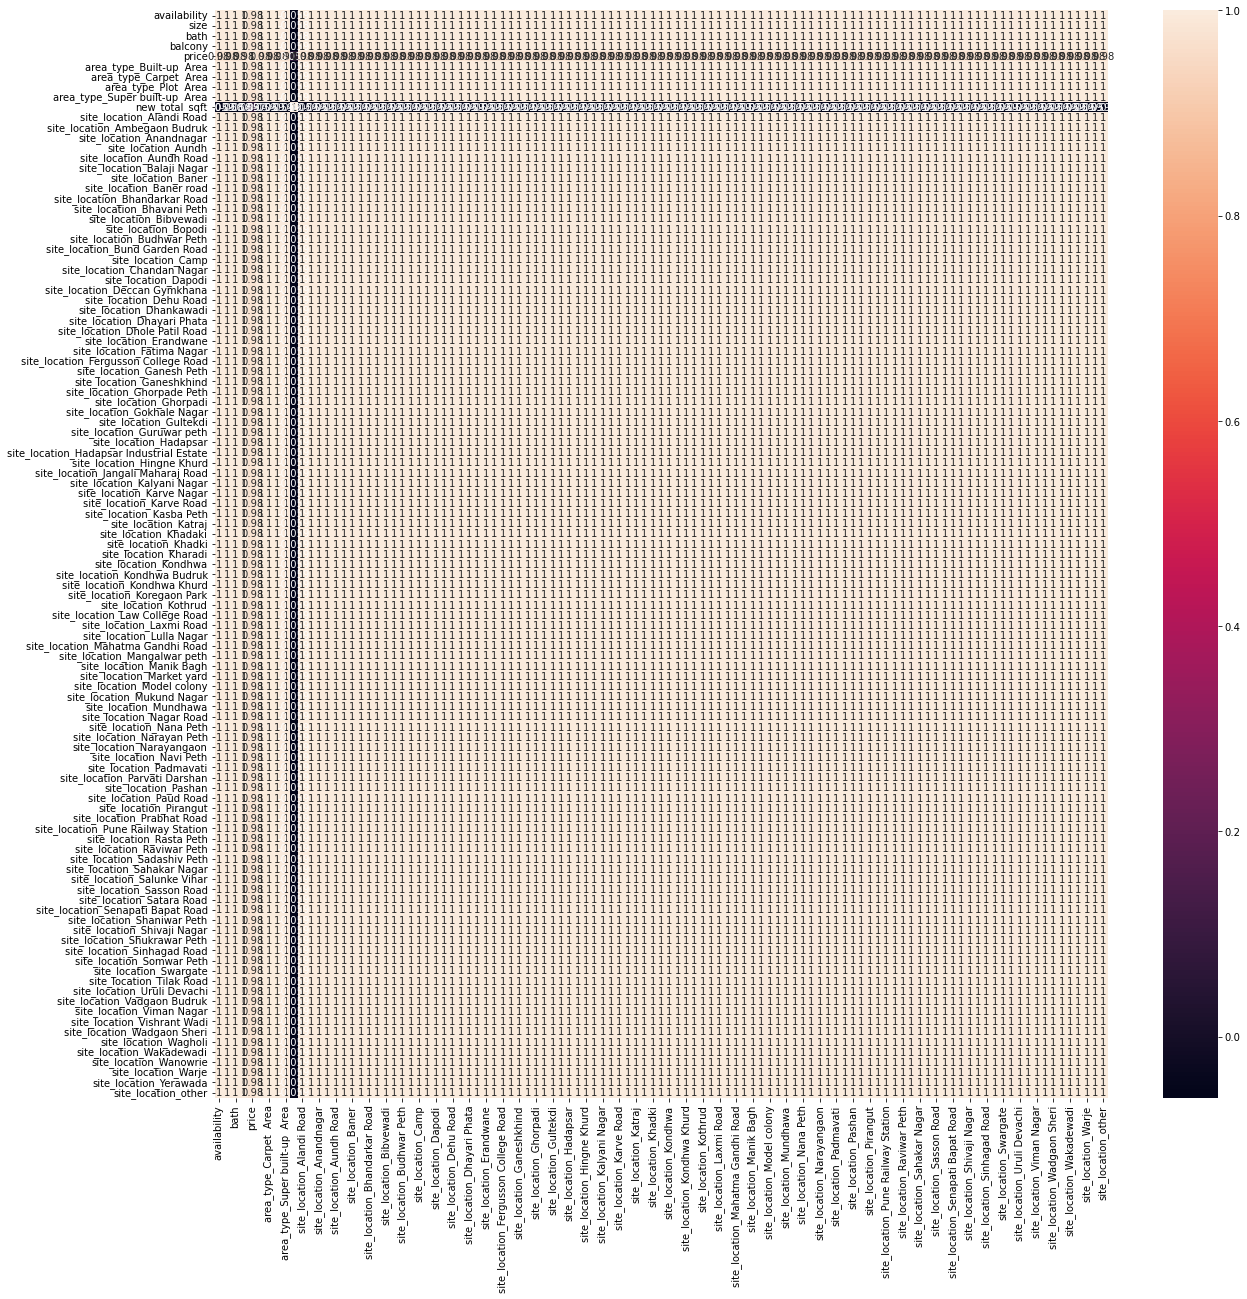

In [94]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

## No multicolinearity

In [99]:
x.columns

Index(['availability', 'size', 'bath', 'balcony', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'new_total_sqft',
       'site_location_Alandi Road',
       ...
       'site_location_Vadgaon Budruk', 'site_location_Viman Nagar',
       'site_location_Vishrant Wadi', 'site_location_Wadgaon Sheri',
       'site_location_Wagholi', 'site_location_Wakadewadi',
       'site_location_Wanowrie', 'site_location_Warje',
       'site_location_Yerawada', 'site_location_other'],
      dtype='object', length=106)

In [97]:
x.shape[1]

106

<AxesSubplot:>

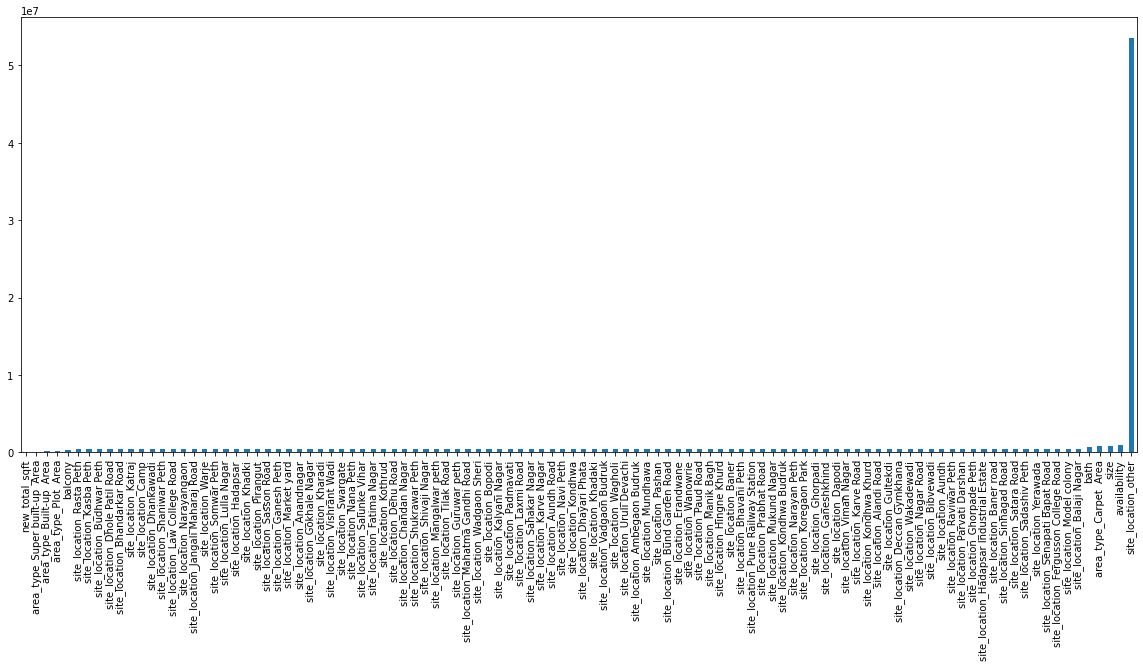

In [98]:
vif_list = []

for i in range(x.shape[1]):
    vif = variance_inflation_factor(x.to_numpy(), i)
    vif_list.append(vif)
    
s1 = pd.Series(vif_list, index = x.columns)
plt.figure(figsize=(20,8))
s1.sort_values().plot(kind="bar")

## 6. Model Training

In [96]:
x = df.drop('price', axis=1)
y = df['price']

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=9)

In [101]:
pune_model = LinearRegression()
pune_model.fit(x_train,y_train)

LinearRegression()

### Post Metric evaluation

In [102]:
y_pred_test = pune_model.predict(x_test)
y_pred_test

array([  88.16902401,  103.61065949,   -9.83335408, ...,   62.33254252,
       1240.        ,  163.31685528])

In [103]:
y_pred_train = pune_model.predict(x_train)
y_pred_train

array([  84.43766564,   62.32880848,   83.68343916, ...,  114.91130565,
       1240.        ,   30.52087689])

### Metric Evaluation

In [104]:
#Testing data
y_pred_test = pune_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print('mse-->',mse)
rmse = np.sqrt(mse)
print('rmse-->',rmse)
mae = mean_absolute_error(y_test,y_pred_test)
print('mae-->',mae)
r2 = r2_score(y_test,y_pred_test)
print('r2 score-->',r2)

mse--> 2646.920647529848
rmse--> 51.4482326958842
mae--> 26.711900080307384
r2 score--> 0.9777481019305774


In [105]:
#Training data
y_pred_train = pune_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print('mse-->',mse)
rmse = np.sqrt(mse)
print('rmse-->',rmse)
mae = mean_absolute_error(y_train,y_pred_train)
print('mae-->',mae)
r2 = r2_score(y_train,y_pred_train)
print('r2 score-->',r2)

mse--> 2443.6725020674307
rmse--> 49.433515979216274
mae--> 26.378613554108323
r2 score--> 0.9776520370121906


## Checking assumptions of linear model after training model

### Normality of residual(Error)

In [106]:
residual_train = y_train - y_pred_train
residual_test = y_test - y_pred_test

<AxesSubplot:xlabel='price', ylabel='Density'>

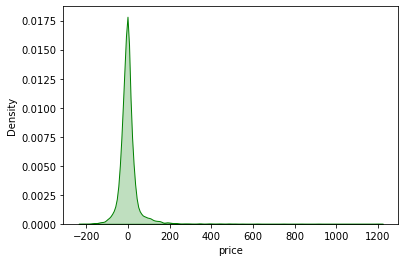

In [107]:
sns.kdeplot(residual_train, fill=True, color="green") #residual is normally distributed-bcz of no skewness

### Homoscadasticity

<AxesSubplot:ylabel='price'>

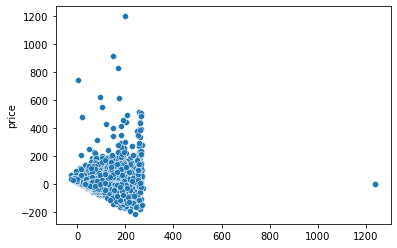

In [108]:
sns.scatterplot(x = y_pred_train, y= residual_train)

<AxesSubplot:ylabel='price'>

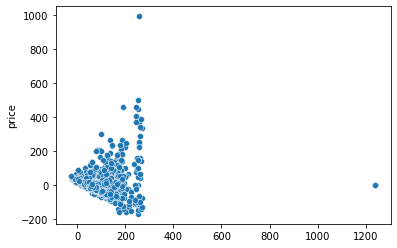

In [109]:
sns.scatterplot(x = y_pred_test, y= residual_test)

## Testing on single row

In [110]:
column_names = x.columns
len(column_names)

106

In [111]:
x.head(1).T

,0
availability,0.0
size,2.0
bath,2.0
balcony,1.0
area_type_Built-up Area,0.0
...,...
site_location_Wakadewadi,0.0
site_location_Wanowrie,0.0
site_location_Warje,0.0
site_location_Yerawada,0.0


In [112]:
x.columns

Index(['availability', 'size', 'bath', 'balcony', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'new_total_sqft',
       'site_location_Alandi Road',
       ...
       'site_location_Vadgaon Budruk', 'site_location_Viman Nagar',
       'site_location_Vishrant Wadi', 'site_location_Wadgaon Sheri',
       'site_location_Wagholi', 'site_location_Wakadewadi',
       'site_location_Wanowrie', 'site_location_Warje',
       'site_location_Yerawada', 'site_location_other'],
      dtype='object', length=106)

In [113]:
column_names

Index(['availability', 'size', 'bath', 'balcony', 'area_type_Built-up  Area',
       'area_type_Carpet  Area', 'area_type_Plot  Area',
       'area_type_Super built-up  Area', 'new_total_sqft',
       'site_location_Alandi Road',
       ...
       'site_location_Vadgaon Budruk', 'site_location_Viman Nagar',
       'site_location_Vishrant Wadi', 'site_location_Wadgaon Sheri',
       'site_location_Wagholi', 'site_location_Wakadewadi',
       'site_location_Wanowrie', 'site_location_Warje',
       'site_location_Yerawada', 'site_location_other'],
      dtype='object', length=106)

In [130]:
# user input
availability =1
print(availability)
size = 20.0
bath = 3.0
balcony = 2.0
new_total_sqft = 2000.0

area_type="Carpet  Area"
site_location="Yerawada"
area_type_col = "area_type_" + area_type
print(area_type_col)
site_location_col="site_location_" + site_location
print(site_location_col)

1
area_type_Carpet  Area
site_location_Yerawada


In [119]:
print(dict1_availability)
print(dict1_size)
list(column_names)

{'19-Dec': 0, 'Ready To Move': 1, '18-May': 0, '18-Feb': 0, '18-Nov': 0, '20-Dec': 0, '17-Oct': 0, '21-Dec': 0, '19-Sep': 0, '20-Sep': 0, '18-Mar': 0, '20-Feb': 0, '18-Apr': 0, '20-Aug': 0, '18-Oct': 0, '19-Mar': 0, '17-Sep': 0, '18-Dec': 0, '17-Aug': 0, '19-Apr': 0, '18-Jun': 0, '22-Dec': 0, '22-Jan': 0, '18-Aug': 0, '19-Jan': 0, '17-Jul': 0, '18-Jul': 0, '21-Jun': 0, '20-May': 0, '19-Aug': 0, '18-Sep': 0, '17-May': 0, '17-Jun': 0, '21-May': 0, '18-Jan': 0, '20-Mar': 0, '17-Dec': 0, '16-Mar': 0, '19-Jun': 0, '22-Jun': 0, '19-Jul': 0, '21-Feb': 0, 'Immediate Possession': 1, '19-May': 0, '17-Nov': 0, '20-Oct': 0, '20-Jun': 0, '19-Feb': 0, '21-Oct': 0, '21-Jan': 0, '17-Mar': 0, '17-Apr': 0, '22-May': 0, '19-Oct': 0, '21-Jul': 0, '21-Nov': 0, '21-Mar': 0, '16-Dec': 0, '22-Mar': 0, '20-Jan': 0, '21-Sep': 0, '21-Aug': 0, '14-Nov': 0, '19-Nov': 0, '15-Nov': 0, '16-Jul': 0, '15-Jun': 0, '17-Feb': 0, '20-Nov': 0, '20-Jul': 0, '16-Sep': 0, '15-Oct': 0, '15-Dec': 0, '16-Oct': 0, '22-Nov': 0, '15

['availability',
 'size',
 'bath',
 'balcony',
 'area_type_Built-up  Area',
 'area_type_Carpet  Area',
 'area_type_Plot  Area',
 'area_type_Super built-up  Area',
 'new_total_sqft',
 'site_location_Alandi Road',
 'site_location_Ambegaon Budruk',
 'site_location_Anandnagar',
 'site_location_Aundh',
 'site_location_Aundh Road',
 'site_location_Balaji Nagar',
 'site_location_Baner',
 'site_location_Baner road',
 'site_location_Bhandarkar Road',
 'site_location_Bhavani Peth',
 'site_location_Bibvewadi',
 'site_location_Bopodi',
 'site_location_Budhwar Peth',
 'site_location_Bund Garden Road',
 'site_location_Camp',
 'site_location_Chandan Nagar',
 'site_location_Dapodi',
 'site_location_Deccan Gymkhana',
 'site_location_Dehu Road',
 'site_location_Dhankawadi',
 'site_location_Dhayari Phata',
 'site_location_Dhole Patil Road',
 'site_location_Erandwane',
 'site_location_Fatima Nagar',
 'site_location_Fergusson College Road',
 'site_location_Ganesh Peth',
 'site_location_Ganeshkhind',
 'site

In [120]:
project_data = {'availability':dict1_availability,'size':dict1_size, 'columns':list(column_names)}
project_data

{'availability': {'19-Dec': 0,
  'Ready To Move': 1,
  '18-May': 0,
  '18-Feb': 0,
  '18-Nov': 0,
  '20-Dec': 0,
  '17-Oct': 0,
  '21-Dec': 0,
  '19-Sep': 0,
  '20-Sep': 0,
  '18-Mar': 0,
  '20-Feb': 0,
  '18-Apr': 0,
  '20-Aug': 0,
  '18-Oct': 0,
  '19-Mar': 0,
  '17-Sep': 0,
  '18-Dec': 0,
  '17-Aug': 0,
  '19-Apr': 0,
  '18-Jun': 0,
  '22-Dec': 0,
  '22-Jan': 0,
  '18-Aug': 0,
  '19-Jan': 0,
  '17-Jul': 0,
  '18-Jul': 0,
  '21-Jun': 0,
  '20-May': 0,
  '19-Aug': 0,
  '18-Sep': 0,
  '17-May': 0,
  '17-Jun': 0,
  '21-May': 0,
  '18-Jan': 0,
  '20-Mar': 0,
  '17-Dec': 0,
  '16-Mar': 0,
  '19-Jun': 0,
  '22-Jun': 0,
  '19-Jul': 0,
  '21-Feb': 0,
  'Immediate Possession': 1,
  '19-May': 0,
  '17-Nov': 0,
  '20-Oct': 0,
  '20-Jun': 0,
  '19-Feb': 0,
  '21-Oct': 0,
  '21-Jan': 0,
  '17-Mar': 0,
  '17-Apr': 0,
  '22-May': 0,
  '19-Oct': 0,
  '21-Jul': 0,
  '21-Nov': 0,
  '21-Mar': 0,
  '16-Dec': 0,
  '22-Mar': 0,
  '20-Jan': 0,
  '21-Sep': 0,
  '21-Aug': 0,
  '14-Nov': 0,
  '19-Nov': 0,
  '

In [122]:
column_names = np.array(column_names)
column_names

array(['availability', 'size', 'bath', 'balcony',
       'area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area',
       'new_total_sqft', 'site_location_Alandi Road',
       'site_location_Ambegaon Budruk', 'site_location_Anandnagar',
       'site_location_Aundh', 'site_location_Aundh Road',
       'site_location_Balaji Nagar', 'site_location_Baner',
       'site_location_Baner road', 'site_location_Bhandarkar Road',
       'site_location_Bhavani Peth', 'site_location_Bibvewadi',
       'site_location_Bopodi', 'site_location_Budhwar Peth',
       'site_location_Bund Garden Road', 'site_location_Camp',
       'site_location_Chandan Nagar', 'site_location_Dapodi',
       'site_location_Deccan Gymkhana', 'site_location_Dehu Road',
       'site_location_Dhankawadi', 'site_location_Dhayari Phata',
       'site_location_Dhole Patil Road', 'site_location_Erandwane',
       'site_location_Fatima Nagar',
       'site_location_Fergus

In [123]:
area_type_index = np.where(column_names == area_type_col)[0][0]
print(area_type_index)

5


In [124]:
site_location_index = np.where(column_names == site_location_col)[0][0]
print(site_location_index)

104


In [131]:
array = np.zeros(len(column_names), dtype =int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 107 entries, availability to site_location_other
dtypes: float64(4), int64(2), uint8(101)
memory usage: 1.9 MB


In [132]:
#array[0] =dict1_availability
array[0]=availability
array[1]=size
array[2]=bath
array[3]=balcony
array[9]=new_total_sqft

array[area_type_index] = 1
array[site_location_index] = 1
#array[dict1_availability] = 1

array

array([   1,   20,    3,    2,    0,    1,    0,    0,    0, 2000,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1,    0])

In [133]:
predicted_price = pune_model.predict([array])[0]  # 2 D
print("Predicted Price of your Home :",np.around(predicted_price,2), "thousands")
final_price = predicted_price/100
print(f"Final Price of your Home is {np.around(final_price)} /- Lakhs Only")

Predicted Price of your Home : 10654.59 thousands
Final Price of your Home is 107.0 /- Lakhs Only


In [ ]:
# pune_model_enconding_col = {'column_names':list(column_names)}
# pune_model_enconding_col

In [1]:
# json_data = {"availability": dict1_availability, "size":dict1_size, 
#              "site_location": site, "columns":x.columns.tolist()}

NameError: name 'dict1_availability' is not defined

In [134]:
import pickle

with open("Pune_model.pkl","wb") as f:
    pickle.dump(pune_model,f)

In [135]:
import json
with open("project_data.json","w") as f:
    json.dump(project_data,f)
